In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it
import statsmodels.formula.api as smf

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

In [2]:
cd

/Users/tk18583


In [3]:
data = pd.read_csv('./../../Volumes/Extreme_SSD/WORK/EPC/gas_consumption/mec_combined_withgap3.csv')
#weather = pd.read_csv('./../../Volumes/Extreme_SSD/WORK/EPC/gas_consumption/Weather_region_to_LSOA_lookup(in).csv')
LSOA = gpd.read_file('./../../Volumes/Extreme_SSD/WORK/boundaries/LSOA2021_DZ2011/GB_LSOA21_DZ11.shp')
vars = pd.read_excel('./../../Volumes/Extreme_SSD/WORK/EPC/gas_consumption/variable_mapping2.xls')
labels = dict(vars.loc[:,['name_final','label']].values)

/var/folders/t5/57qdsp617xj8dd1by4td7fl40000gq/T/ipykernel_95645/2814370852.py:1: DtypeWarning: Columns (100,101,143) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./../../Volumes/Extreme_SSD/WORK/EPC/gas_consumption/mec_combined_withgap3.csv')


In [4]:
LSOA = LSOA.merge(data, right_on='LSOA_CODE_GB', left_on='mapcode', how='right')
LSOA.columns

Index(['label', 'lsoa21cd', 'lsoa21nm', 'name', 'lsoa21cd_2', 'Name_2',
       'TotPop2011', 'ResPop2011', 'HHCnt2011', 'StdAreaHa',
       ...
       'E_PropAge_modal', 'COUNTRY2', 'D_Pred_Rank_Ener_m2_mean',
       'D2_Pred_Rank_Ener_m2_mean', 'D_GAP_raw', 'D2_GAP_raw', 'D_GAP_rank',
       'D2_GAP_rank', 'D_GAP_normalised', 'D2_GAP_normalised'],
      dtype='object', length=172)

In [5]:
data.columns.tolist()

['LSOA_CODE_GB',
 'LSOA_NAME_GB',
 'A_GasMeter_num',
 'A_Gas_Consump_tot',
 'A_Gas_Consump_mean',
 'A_Gas_Consump_med',
 'A_GasNonMeter_num',
 'A_ElecMeter_num',
 'A_Elec_Consump_tot',
 'A_Elec_Consump_mean',
 'A_Elec_Consump_med',
 'C_DomProp_num',
 'C_DomGasMeter_num',
 'C_OffGrid_num',
 'C_OffGrid_prop',
 'E_FloorArea_med',
 'E_FloorArea_mean',
 'E_EPC_num',
 'D_EPC_vs_Census_prop',
 'C_Residents_tot',
 'COUNTRY',
 'D_Gas_Elec_Meter_ratio',
 'D_Act_Ener_Consump_mean',
 'D_Act_Gas_Consump_m2_mean',
 'D_Act_Gas_Consump_m2_med',
 'D_Act_Elec_Consump_m2_mean',
 'D_Act_Elec_Consump_m2_med',
 'D_Act_Ener_Consump_m2_mean',
 'D_Act_Rank_Gas_m2',
 'D_Act_Rank_Elec_m2',
 'D_Act_Rank_Ener_m2_averaged',
 'D_Act_Rank_Ener_m2',
 'E_MULTI_GLAZE_PROP_med',
 'E_MULTI_GLAZE_PROP_mean',
 'E_EXTENSION_COUNT_mean',
 'E_PHOTO_SUPPLY_prop',
 'E_ROOF_INSULATION_prop',
 'E_THATCHED_prop',
 'E_OpenFire_mean',
 'E_OpenFire_prop',
 'E_HEAT_MAIN_ELECTRIC_prop',
 'E_HEAT_MAIN_SOLIDFUEL_prop',
 'E_HEAT_MAIN_OTHER

In [11]:
bristol = data[data['REGION']=='South West']
bristol = bristol[bristol['LAD25NM']=='Bristol, City of']

In [13]:
bristol['E_EPC_num'].sum()

np.int64(119005)

In [163]:
data['WEATHER_REGION'] = data['WEATHER_REGION'].astype(str)

In [8]:
base1 = ['A_GasMeter_num',
 'A_Gas_Consump_tot',
 'A_Gas_Consump_mean',
 'A_GasNonMeter_num',
 'A_ElecMeter_num',
 'C_DomProp_num',
 'C_DomGasMeter_num',
 'C_OffGrid_num',
 'C_OffGrid_prop',
 'E_FloorArea_mean',
 'E_EPC_num',
 'D_EPC_vs_Census_prop',
 'C_Residents_tot','D_Gas_Elec_Meter_ratio']

house = ['E_MULTI_GLAZE_PROP_med',
 'E_MULTI_GLAZE_PROP_mean',
 'E_EXTENSION_COUNT_mean',
 'E_PHOTO_SUPPLY_prop',
 'E_PHOTO_SUPPLY_mean',
 'E_ROOF_INSULATION_prop',
 'E_THATCHED_prop',
 'E_OpenFire_mean',
 'E_OpenFire_prop',
 'E_HEAT_MAIN_ELECTRIC_prop',
 'E_HEAT_MAIN_SOLIDFUEL_prop',
 'E_HEAT_MAIN_OTHER_prop',
 'E_HEAT_MAIN_ELECTRIC_OTHER_prop',
 'E_HEAT_MAIN_ELECTRIC_SOLID_prop',
 'E_HEAT_MAIN_SOLID_OTHER_prop',
 'E_HEAT_MAIN_HEATPUMP_prop',
 'E_HEAT_2ND_ELECTRIC_prop',
 'E_HEAT_2ND_SOLIDFUEL_prop',
 'E_HEAT_2ND_OTHER_prop',
 'E_HEAT_2ND_ELECTRIC_OTHER_prop',
 'E_HEAT_2ND_ELECTRIC_SOLID_prop',
 'E_HEAT_2ND_SOLID_OTHER_prop',
 'E_HEAT_2ND_HEATPUMP_prop',
 'E_MAINS_GAS_prop',
 'E_SOLID_FUEL_HIGH',
 'E_TENURE_OWNED_prop',
 'E_TENURE_PRIVRENT_prop',
 'E_TENURE_SOCRENT_prop',
 'E_TYPE_DETACHED_prop',
 'E_TYPE_ENDTERRACE_prop',
 'E_TYPE_MIDTERRACE_prop',
 'E_TYPE_SEMI_prop',
 'E_TYPE_BUNGALOW_prop',
 'E_TYPE_FLAT_prop',
 'E_TYPE_HOUSE_prop',
 'E_TYPE_MAISONETTE_prop',
 'E_TYPE_PARKHOME_prop',
 'E_AGE_1976_2002_prop',
 'E_AGE_1930_1949_prop',
 'E_AGE_pre1929_prop',
 'E_AGE_1950_1975_prop',
 'E_AGE_post2003',
 'E_AGE_mean',
 'E_EFFICIENCY_mean',
 'E_EFFICIENCY_BAND_mean',
 'E_Pot_Ener_Consump_m2_mean',
 'E_TYPE_TOPFLOORFLAT_prop',
 'E_TRANS_TYPE_OTHER_prop',
 'E_TRANS_TYPE_GOVDEAL_prop',
 'E_CROWDING']
 

census = [ 'C_ALL_HOUSEHOLDS_tot',
 'C_ALL_RESIDENTS_tot',
 'C_USUAL_ADULT_RESIDENTS_tot',
 'C_EMPLOYED_tot',
 'C_AGE_UNDER19_prop',
 'C_AGE_20_64_prop',
 'C_AGE_65PLUS_prop',
 'C_CENSUS_DEPRIVATION_EW',
 'C_DISABLED_prop',
 'C_ECON_EMPLOYED_prop',
 'C_ECON_UNEMP_prop',
 'C_ECON_STUD_prop',
 'C_ECON_RETIRED_prop',
 'C_ECON_CARER_prop',
 'C_ECON_SICK_prop',
 'C_ECON_OTHER_prop',
 'C_ETHNIC_ASIAN_prop',
 'C_ETHNIC_BLACK_prop',
 'C_ETHNIC_MIXED_prop',
 'C_ETHNIC_WHITE_prop',
 'C_ETHNIC_WHITEOTH_prop',
 'C_HHCOMP_SINGLE_prop',
 'C_OVER_OCCUPIED_prop',
 'C_UNDER_OCCUPIED_prop',
 'C_POPDENSITY',
 'C_SECONDHOMES',
 'C_TENURE_OWNED',
 'C_TENURE_OUTRIGHT',
 'C_TENURE_MORTGAGE',
 'C_TENURE_SOCRENT',
 'C_TENURE_COUNCIL',
 'C_TENURE_OTHERSOC',
 'C_TENURE_PRIVRENT',
 'C_WORKFROMHOME',
 'C_WORKOFFSHORE',
 'C_DEP_rank',
 'C_DEP_percentile',
 'C_DEP_decile',
 'C_DEP_quintile',]

gap = [
 'D_GAP_raw',
 'D_GAP_rank','D_GAP_normalised']

cats = ['WEATHER_REGION','C_RurUrb_bin','COUNTRY']

In [164]:
heat_loss = [ 
 'E_MULTI_GLAZE_PROP_mean',
 'E_EXTENSION_COUNT_mean',
 'E_ROOF_INSULATION_prop',
 'E_OpenFire_mean', ]


other_fuel = [
    'E_PHOTO_SUPPLY_prop',
    'E_HEAT_MAIN_ELECTRIC_prop',
 'E_HEAT_MAIN_HEATPUMP_prop',
 'E_HEAT_MAIN_SOLIDFUEL_prop',
 'E_HEAT_MAIN_OTHER_prop']



In [166]:
scot = data[data['COUNTRY'] == 'Scotland']
eng = data[data['COUNTRY'] == 'England and Wales']

# PCA

In [165]:
li_col = heat_loss 

In [167]:
data_norm_eng = eng.loc[:,li_col ]
data_norm_eng = data_norm_eng.fillna(0)

data_norm_scot = scot.loc[:,li_col ]
data_norm_scot = data_norm_scot.fillna(0)

In [168]:
data_norm_eng 

,E_MULTI_GLAZE_PROP_mean,E_EXTENSION_COUNT_mean,E_ROOF_INSULATION_prop,E_OpenFire_mean
0,86.09,0.04,12.427746,0.00
1,81.47,0.06,7.158837,0.00
2,70.23,0.17,12.343750,0.00
3,95.10,0.10,11.764706,0.00
4,95.26,0.47,77.994429,0.05
...,...,...,...,...
42636,99.01,0.19,29.768271,0.01
42637,99.78,0.28,73.827160,0.03
42638,98.32,0.42,80.579710,0.06
42639,100.00,0.42,34.545455,0.03


In [169]:
def replace_0(data,var):
    data[var] = np.where(data[var] == 0, 0.001, data[var])

list_replace = data_norm_eng.columns
for i in list_replace:
    replace_0(data_norm_eng, i)

list_replace = data_norm_scot.columns
for i in list_replace:
    replace_0(data_norm_scot, i)

In [170]:
li_right = [] # log
for col in data_norm_eng.select_dtypes(include=[np.number]).columns:
    skew = data_norm_eng[col].skew()
    if skew > 1:
        li_right.append(col)

li_left = [] # exp
for col in data_norm_eng.select_dtypes(include=[np.number]).columns:
    skew = data_norm_eng[col].skew()
    if skew < -1:
        li_left.append(col)

for i in list(li_right):
    data_norm_eng[i] = np.log(data_norm_eng[i])

for i in list(li_left):
    data_norm_eng[i] = np.exp(data_norm_eng[i])
    
for col in data_norm_eng.select_dtypes(include=[np.number]).columns:
    skew = data_norm_eng[col].skew()
    if abs(skew) > 1:
        print(f"{col}: skew = {skew:.2f}")


E_MULTI_GLAZE_PROP_mean: skew = 2.01
E_ROOF_INSULATION_prop: skew = 4.67
E_OpenFire_mean: skew = -1.35


In [171]:
def zscore_and_rescale(df, columns, lower=-100, upper=100):
    """
    Standardize variables using z-score, then rescale to [lower, upper].

    Parameters:
    - df: pandas DataFrame
    - columns: list of column names to process
    - lower, upper: target range

    Returns:
    - DataFrame with new columns named <col>_std
    """
    df_scaled = df.copy()

    for col in columns:
        mean = df[col].mean()
        std = df[col].std()

        if std == 0:
            df_scaled[col ] = 0
        else:
            z = (df[col] - mean) / std
            z_min = z.min()
            z_max = z.max()

            # Rescale z-score to [lower, upper]
            if z_min == z_max:
                df_scaled[col ] = 0
            else:
                rescaled = ((z - z_min) / (z_max - z_min)) * (upper - lower) + lower
                df_scaled[col ] = rescaled

    return df_scaled

In [172]:
data_scaled_eng = zscore_and_rescale(data_norm_eng, li_col, lower=-100, upper=100)
data_scaled_scot = zscore_and_rescale(data_norm_scot, li_col, lower=-100, upper=100)
# Check result
data_scaled_eng


,E_MULTI_GLAZE_PROP_mean,E_EXTENSION_COUNT_mean,E_ROOF_INSULATION_prop,E_OpenFire_mean
0,-99.999818,-96.038598,-100.000000,-100.000000
1,-99.999998,-94.007110,-100.000000,-100.000000
2,-100.000000,-82.833926,-100.000000,-100.000000
3,-98.510683,-89.944134,-100.000000,-100.000000
4,-98.252271,-52.361605,-100.000000,19.431386
...,...,...,...,...
42636,-25.684662,-80.802438,-100.000000,-29.703653
42637,60.503760,-71.660741,-100.000000,3.836229
42638,-62.725205,-57.440325,-99.999999,24.997538
42639,100.000000,-57.440325,-100.000000,3.836229


In [173]:
data_pca_eng = data_scaled_eng.loc[:,data_scaled_eng.columns.isin(li_col)]
data_pca_scot = data_scaled_scot.loc[:,data_scaled_scot.columns.isin(li_col)]

In [174]:
def apply_pca(df, columns, n_components=1):

    pca = PCA(n_components=n_components)
    components = pca.fit_transform(df)

    # Add the first principal component as a new column
    var1 = components[:, 0]

    return var1

In [175]:
eng['heat_loss'] = apply_pca(data_pca_eng.loc[:,heat_loss], columns=list(heat_loss), n_components=1)

scot['heat_loss'] = apply_pca(data_pca_scot.loc[:,heat_loss], columns=list(heat_loss), n_components=1)


/var/folders/t5/57qdsp617xj8dd1by4td7fl40000gq/T/ipykernel_13291/1491127473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng['heat_loss'] = apply_pca(data_pca_eng.loc[:,heat_loss], columns=list(heat_loss), n_components=1)
/var/folders/t5/57qdsp617xj8dd1by4td7fl40000gq/T/ipykernel_13291/1491127473.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scot['heat_loss'] = apply_pca(data_pca_scot.loc[:,heat_loss], columns=list(heat_loss), n_components=1)


In [176]:
eng

,LSOA_CODE_GB,LSOA_NAME_GB,A_GasMeter_num,A_Gas_Consump_tot,A_Gas_Consump_mean,A_Gas_Consump_med,A_GasNonMeter_num,A_ElecMeter_num,A_Elec_Consump_tot,A_Elec_Consump_mean,...,COUNTRY2,D_Pred_Rank_Ener_m2_mean,D2_Pred_Rank_Ener_m2_mean,D_GAP_raw,D2_GAP_raw,D_GAP_rank,D2_GAP_rank,D_GAP_normalised,D2_GAP_normalised,heat_loss
0,E01000001,City of London 001A,54,5.427412e+05,10050.763673,4885.651770,0.0,1055,3951091.502,3745.110428,...,England,77,74.0,64.920791,52.690791,-19,-22.0,-0.705033,-0.759673,73.462741
1,E01000002,City of London 001B,16,4.177373e+05,26108.583697,14408.743458,0.0,1165,3892982.253,3341.615668,...,England,5,1.0,-270.591857,-293.711857,-95,-99.0,-9.568915,-11.083665,72.748264
2,E01000003,City of London 001C,545,3.685674e+06,6762.705232,5468.133361,17.0,1271,3102470.068,2440.967795,...,England,24,34.0,56.099660,67.789660,-31,-21.0,-0.651480,-0.458910,68.819328
3,E01000005,City of London 001E,394,2.628638e+06,6671.670332,4043.401373,35.0,580,1367175.179,2357.198584,...,England,8,3.0,21.698304,16.458304,-42,-47.0,-1.405459,-2.156199,72.354950
4,E01000006,Barking and Dagenham 016A,403,5.857459e+06,14534.638023,13708.799169,6.0,528,2076019.903,3931.855877,...,England,64,40.0,40.505309,18.075309,-34,-58.0,-1.318854,-1.843763,-15.308277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42636,W01002036,Vale of Glamorgan 005G,704,5.056894e+06,7183.087986,5933.914535,0.0,856,2362219.031,2759.601672,...,Wales,2,2.0,10.179391,44.319391,-5,-5.0,-1.448149,-1.409035,75.844833
42637,W01002037,Vale of Glamorgan 005H,541,4.862706e+06,8988.365173,8319.211369,13.0,636,1695481.337,2665.851159,...,Wales,19,7.0,65.256894,52.666894,-8,-20.0,-0.353349,-1.026978,111.591901
42638,W01002038,Vale of Glamorgan 014G,586,5.775592e+06,9855.959031,8335.054669,5.0,638,1998086.218,3131.796580,...,Wales,29,20.0,83.888980,77.818980,9,0.0,0.095621,-0.226081,7.698408
42639,W01002039,Vale of Glamorgan 014H,748,6.929357e+06,9263.846230,8589.548839,0.0,748,2399307.979,3207.630988,...,Wales,2,3.0,-3.975723,59.444277,-4,-3.0,-1.751454,-0.923644,134.049702


In [186]:
cols_std = [ 'A_GasMeter_num',
 'A_Gas_Consump_tot',
 'A_Gas_Consump_mean',
 'A_Gas_Consump_med',
 'A_GasNonMeter_num',
 'A_ElecMeter_num',
 'A_Elec_Consump_tot',
 'A_Elec_Consump_mean',
 'A_Elec_Consump_med',
 'C_DomProp_num',
 'C_DomGasMeter_num',
 'C_OffGrid_num',
 'C_OffGrid_prop',
 'E_FloorArea_med',
 'E_FloorArea_mean',
 'E_EPC_num',
 'D_EPC_vs_Census_prop',
 'C_Residents_tot',
 'D_Gas_Elec_Meter_ratio',
 'D_Act_Ener_Consump_mean',
 'D_Act_Gas_Consump_m2_mean',
 'D_Act_Gas_Consump_m2_med',
 'D_Act_Elec_Consump_m2_mean',
 'D_Act_Elec_Consump_m2_med',
 'D_Act_Ener_Consump_m2_mean',
 'D_Act_Rank_Gas_m2',
 'D_Act_Rank_Elec_m2',
 'D_Act_Rank_Ener_m2_averaged',
 'D_Act_Rank_Ener_m2',
 'E_MULTI_GLAZE_PROP_med',
 'E_MULTI_GLAZE_PROP_mean',
 'E_EXTENSION_COUNT_mean',
 'E_PHOTO_SUPPLY_prop',
 'E_ROOF_INSULATION_prop',
 'E_THATCHED_prop',
 'E_OpenFire_mean',
 'E_OpenFire_prop',
 'E_HEAT_MAIN_ELECTRIC_prop',
 'E_HEAT_MAIN_SOLIDFUEL_prop',
 'E_HEAT_MAIN_OTHER_prop',
 'E_HEAT_MAIN_ELECTRIC_OTHER_prop',
 'E_HEAT_MAIN_ELECTRIC_SOLID_prop',
 'E_HEAT_MAIN_SOLID_OTHER_prop',
 'E_HEAT_MAIN_HEATPUMP_prop',
 'E_HEAT_2ND_ELECTRIC_prop',
 'E_HEAT_2ND_SOLIDFUEL_prop',
 'E_HEAT_2ND_OTHER_prop',
 'E_HEAT_2ND_ELECTRIC_OTHER_prop',
 'E_HEAT_2ND_ELECTRIC_SOLID_prop',
 'E_HEAT_2ND_SOLID_OTHER_prop',
 'E_HEAT_2ND_HEATPUMP_prop',
 'E_MAINS_GAS_prop',
 'E_AGE_med',
 'E_AGE_mean',
 'E_TENURE_OWNED_prop',
 'E_TENURE_PRIVRENT_prop',
 'E_TENURE_SOCRENT_prop',
 'E_TYPE_DETACHED_prop',
 'E_TYPE_ENDTERRACE_prop',
 'E_TYPE_MIDTERRACE_prop',
 'E_TYPE_SEMI_prop',
 'E_TYPE_BUNGALOW_prop',
 'E_TYPE_FLAT_prop',
 'E_TYPE_HOUSE_prop',
 'E_TYPE_MAISONETTE_prop',
 'E_TYPE_PARKHOME_prop',
 'E_AGE_1976_2002_prop',
 'E_AGE_1930_1949_prop',
 'E_AGE_pre1929_prop',
 'E_AGE_1950_1975_prop',
 'E_AGE_post2003',
 'E_EFFICIENCY_med',
 'E_EFFICIENCY_mean',
 'E_EFFICIENCY_BAND_med',
 'E_EFFICIENCY_BAND_mean',
 'E_Pred_Ener_Consump_m2_med',
 'E_Pred_Ener_Consump_m2_mean',
 'E_Pot_Ener_Consump_m2_med',
 'E_Pot_Ener_Consump_m2_mean',
 'E_Pred_Ener_Consump_tot_med',
 'E_Pred_Ener_Consump_tot_mean',
 'E_Pot_Ener_Consump_tot_med',
 'E_Pot_Ener_Consump_tot_mean',
 'E_TYPE_TOPFLOORFLAT_prop',
 'E_TRANS_TYPE_OTHER_prop',
 'E_TRANS_TYPE_GOVDEAL_prop',
 'E_CROWDING',
 'E_PHOTO_SUPPLY_med',
 'E_PHOTO_SUPPLY_mean',
 'E2_EPC_num',
 'E2_EFFICIENCY_mean',
 'E2_Pred_Ener_Consump_m2_mean',
 'E2_Pred_Ener_Consump_m2_med',
 'C_ALL_HOUSEHOLDS_tot',
 'C_ALL_RESIDENTS_tot',
 'C_USUAL_ADULT_RESIDENTS_tot',
 'C_EMPLOYED_tot',
 'C_AGE_UNDER19_prop',
 'C_AGE_20_64_prop',
 'C_AGE_65PLUS_prop',
 'C_CENSUS_DEPRIVATION_EW',
 'C_DISABLED_prop',
 'C_ECON_EMPLOYED_prop',
 'C_ECON_UNEMP_prop',
 'C_ECON_STUD_prop',
 'C_ECON_RETIRED_prop',
 'C_ECON_CARER_prop',
 'C_ECON_SICK_prop',
 'C_ECON_OTHER_prop',
 'C_ETHNIC_ASIAN_prop',
 'C_ETHNIC_BLACK_prop',
 'C_ETHNIC_MIXED_prop',
 'C_ETHNIC_WHITE_prop',
 'C_ETHNIC_WHITEOTH_prop',
 'C_HHCOMP_SINGLE_prop',
 'C_OVER_OCCUPIED_prop',
 'C_UNDER_OCCUPIED_prop',
 'C_POPDENSITY',
 'C_SECONDHOMES',
 'C_TENURE_OWNED',
 'C_TENURE_OUTRIGHT',
 'C_TENURE_MORTGAGE',
 'C_TENURE_SOCRENT',
 'C_TENURE_COUNCIL',
 'C_TENURE_OTHERSOC',
 'C_TENURE_PRIVRENT',
 'C_WORKFROMHOME',
 'C_WORKOFFSHORE',
 'C_DEP_rank',
 'C_DEP_percentile',
 'C_DEP_decile',
 'C_DEP_quintile',
 'E_SOLID_FUEL_HIGH',
 'D_Pred_Rank_Ener_m2_mean',
 'D2_Pred_Rank_Ener_m2_mean',
 'D_GAP_raw',
 'D2_GAP_raw',
 'D_GAP_rank',
 'D2_GAP_rank']

In [187]:
eng['E_PropAge_modal']

0           1950-1975
1        2003_onwards
2           1950-1975
3           1950-1975
4           1930-1949
             ...     
42636       1976-2002
42637       1976-2002
42638       1950-1975
42639    2003_onwards
42640    2003_onwards
Name: E_PropAge_modal, Length: 35671, dtype: object

In [189]:
len(eng)

35671

In [190]:
len(eng['LSOA_CODE_GB'].unique())

35671

In [188]:
eng = zscore_and_rescale(eng,cols_std, lower=-100, upper=100)
scot = zscore_and_rescale(scot,cols_std, lower=-100, upper=100)

In [192]:
LENG = LSOA.merge(eng,left_on='mapcode', right_on='LSOA_CODE_GB', how='right')
LSCOT = LSOA.merge(scot,left_on='mapcode', right_on='LSOA_CODE_GB', how='right')

In [195]:
LENG.to_file('./../../Volumes/Extreme_SSD/WORK/EPC/gas_consumption/LSOA_std_ENGLAND.geojson', driver='GeoJSON')
LSCOT.to_file('./../../Volumes/Extreme_SSD/WORK/EPC/gas_consumption/LSOA_std_SCOTLAND.geojson', driver='GeoJSON')

In [178]:
eng.columns.tolist()

['LSOA_CODE_GB',
 'LSOA_NAME_GB',
 'A_GasMeter_num',
 'A_Gas_Consump_tot',
 'A_Gas_Consump_mean',
 'A_Gas_Consump_med',
 'A_GasNonMeter_num',
 'A_ElecMeter_num',
 'A_Elec_Consump_tot',
 'A_Elec_Consump_mean',
 'A_Elec_Consump_med',
 'C_DomProp_num',
 'C_DomGasMeter_num',
 'C_OffGrid_num',
 'C_OffGrid_prop',
 'E_FloorArea_med',
 'E_FloorArea_mean',
 'E_EPC_num',
 'D_EPC_vs_Census_prop',
 'C_Residents_tot',
 'COUNTRY',
 'D_Gas_Elec_Meter_ratio',
 'D_Act_Ener_Consump_mean',
 'D_Act_Gas_Consump_m2_mean',
 'D_Act_Gas_Consump_m2_med',
 'D_Act_Elec_Consump_m2_mean',
 'D_Act_Elec_Consump_m2_med',
 'D_Act_Ener_Consump_m2_mean',
 'D_Act_Rank_Gas_m2',
 'D_Act_Rank_Elec_m2',
 'D_Act_Rank_Ener_m2_averaged',
 'D_Act_Rank_Ener_m2',
 'E_MULTI_GLAZE_PROP_med',
 'E_MULTI_GLAZE_PROP_mean',
 'E_EXTENSION_COUNT_mean',
 'E_PHOTO_SUPPLY_prop',
 'E_ROOF_INSULATION_prop',
 'E_THATCHED_prop',
 'E_OpenFire_mean',
 'E_OpenFire_prop',
 'E_HEAT_MAIN_ELECTRIC_prop',
 'E_HEAT_MAIN_SOLIDFUEL_prop',
 'E_HEAT_MAIN_OTHER

In [196]:
base_eng = eng.loc[:,['LSOA_CODE_GB','D_GAP_normalised','C_OffGrid_prop','E_FloorArea_mean','WEATHER_REGION', 'E_EFFICIENCY_mean','E_AGE_mean','D_Gas_Elec_Meter_ratio','E_HEAT_MAIN_HEATPUMP_prop','E_SOLID_FUEL_HIGH','E_OpenFire_mean','heat_loss']]
#base_eng['E_AGE_mean'] = np.where(base_eng['E_AGE_mean'].isna(), base_eng['E_AGE_mean'].mean(), base_eng['E_AGE_mean'])
base_eng  = zscore_and_rescale(base_eng , ['C_OffGrid_prop','E_FloorArea_mean', 'E_EFFICIENCY_mean','E_AGE_mean','D_Gas_Elec_Meter_ratio','E_HEAT_MAIN_HEATPUMP_prop','E_SOLID_FUEL_HIGH','E_OpenFire_mean','heat_loss'], lower=-100, upper=100)
base_eng

,LSOA_CODE_GB,D_GAP_normalised,C_OffGrid_prop,E_FloorArea_mean,WEATHER_REGION,E_EFFICIENCY_mean,E_AGE_mean,D_Gas_Elec_Meter_ratio,E_HEAT_MAIN_HEATPUMP_prop,E_SOLID_FUEL_HIGH,E_OpenFire_mean,heat_loss
0,E01000001,-0.705033,89.72,-84.106152,1,-2.842171e-14,-6.766917,-99.244814,-98.843931,-100.0,-100.000000,10.855944
1,E01000002,-9.568915,97.24,-83.826297,1,3.873438e+01,-53.383459,-99.797369,-98.210291,-100.0,-100.000000,10.421815
2,E01000003,-0.651480,5.54,-89.186972,1,2.269246e+01,-11.278195,-93.673498,-99.687500,-100.0,-100.000000,8.034526
3,E01000005,-1.405459,-12.90,-89.215923,1,3.482467e+01,-18.295739,-89.977388,-100.000000,-100.0,-100.000000,10.182831
4,E01000006,-1.318854,-54.34,-75.411339,12,-6.811769e+00,36.842105,-88.738823,-100.000000,-100.0,-85.714286,-43.082844
...,...,...,...,...,...,...,...,...,...,...,...,...
42636,W01002036,-1.448149,-67.62,-77.457177,5W,5.090689e+01,-47.368421,-87.865788,-100.000000,-100.0,-97.142857,12.303343
42637,W01002037,-0.353349,-75.88,-78.176116,5W,1.821846e+01,-12.781955,-87.449737,-100.000000,-100.0,-91.428571,34.023873
42638,W01002038,0.095621,-81.84,-72.173703,5W,6.690850e+00,-0.751880,-86.448430,-100.000000,-100.0,-82.857143,-29.103589
42639,W01002039,-1.751454,-99.46,-66.557298,5W,5.679162e+01,-82.456140,-85.245902,-99.595960,-100.0,-91.428571,47.669616


In [197]:
dependent_var = 'D_GAP_normalised'
control_vars = ['C_OffGrid_prop', 'E_FloorArea_mean', 'WEATHER_REGION']
control_vars = ' + '.join(control_vars)
independent_vars = ['E_EFFICIENCY_mean','E_SOLID_FUEL_HIGH','E_HEAT_MAIN_HEATPUMP_prop','D_Gas_Elec_Meter_ratio','E_AGE_mean','heat_loss']
independent_vars = ' + '.join(independent_vars)

In [198]:
null_eng = f"{dependent_var} ~ {control_vars}"
null_eng = smf.glm(formula=null_eng, data=base_eng, family=sm.families.Gaussian()).fit()
null_eng.summary()

formula1_eng = f"{dependent_var} ~ {control_vars} + {independent_vars}"
model1_eng = smf.glm(formula=formula1_eng, data=base_eng, family=sm.families.Gaussian()).fit()
model1_eng.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       D_GAP_normalised   No. Observations:                35669
Model:                            GLM   Df Residuals:                    35646
Model Family:                Gaussian   Df Model:                           22
Link Function:               Identity   Scale:                         0.50628
Method:                          IRLS   Log-Likelihood:                -38461.
Date:                Wed, 13 Aug 2025   Deviance:                       18047.
Time:                        13:28:28   Pearson chi2:                 1.80e+04
No. Iterations:                     3   Pseudo R-squ. (CS):             0.8472
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.5714      0.308     -1.857      0.063      -1.174       0.032
WEATHER_REGION[T.10]          0.9346      0.022     42.895      0.000       0.892       0.977
WEATHER_REGION[T.11]          0.6650      0.014     46.109      0.000       0.637       0.693
WEATHER_REGION[T.12]          0.5576      0.016     35.562      0.000       0.527       0.588
WEATHER_REGION[T.13]          1.4277      0.035     40.636      0.000       1.359       1.497
WEATHER_REGION[T.2]           0.4581      0.017     27.420      0.000       0.425       0.491
WEATHER_REGION[T.3]           0.5832      0.019     30.022      0.000       0.545       0.621
WEATHER_REGION[T.4]           1.0508      0.024     44.507      0.000       1.005       1.097
WEATHER_REGION[T.5E]          0.7420      0.019     39.821      0.000       0.705       0.779
WEATHER_REGION[T.5W]          0.7286      0.022     32.653      0.000       0.685       0.772
WEATHER_REGION[T.6]           0.5201      0.013     39.335      0.000       0.494       0.546
WEATHER_REGION[T.7E]          0.6493      0.014     46.591      0.000       0.622       0.677
WEATHER_REGION[T.7W]          0.9296      0.045     20.446      0.000       0.840       1.019
WEATHER_REGION[T.8E]          1.1680      0.041     28.293      0.000       1.087       1.249
WEATHER_REGION[T.9E]          0.7993      0.025     31.862      0.000       0.750       0.848
C_OffGrid_prop               -0.0046      0.000    -18.116      0.000      -0.005      -0.004
E_FloorArea_mean            6.85e-05      0.000      0.143      0.886      -0.001       0.001
E_EFFICIENCY_mean            -0.0401      0.000   -137.388      0.000      -0.041      -0.040
E_SOLID_FUEL_HIGH             0.0011    8.8e-05     12.970      0.000       0.001       0.001
E_HEAT_MAIN_HEATPUMP_prop     0.0278      0.001     33.396      0.000       0.026       0.029
D_Gas_Elec_Meter_ratio       -0.0287      0.003     -9.037      0.000      -0.035      -0.022
E_AGE_mean                   -0.0012      0.000     -7.443      0.000      -0.002      -0.001
heat_loss                     0.0013      0.000      7.260      0.000       0.001       0.002
=============================================================================================
"""

In [93]:
round(1 - model1_eng.deviance / null_eng.deviance,2)

np.float64(0.52)

In [49]:
from patsy import dmatrices

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [85]:
y, X = dmatrices(formula1_eng, data=base_eng, return_type='dataframe')

# 2. Calculate VIF for each column in X
vif_df = pd.DataFrame()
vif_df["variable"] = X.columns
vif_df["VIF"] = [vif(X.values, i) for i in range(X.shape[1])]

print(vif_df)

                         variable          VIF
0                       Intercept  6658.603818
1            WEATHER_REGION[T.10]     1.158084
2            WEATHER_REGION[T.11]     1.452128
3            WEATHER_REGION[T.12]     1.334742
4            WEATHER_REGION[T.13]     1.112013
5             WEATHER_REGION[T.2]     1.247814
6             WEATHER_REGION[T.3]     1.179470
7             WEATHER_REGION[T.4]     1.142966
8            WEATHER_REGION[T.5E]     1.209813
9            WEATHER_REGION[T.5W]     1.136499
10            WEATHER_REGION[T.6]     1.525777
11           WEATHER_REGION[T.7E]     1.425988
12           WEATHER_REGION[T.7W]     1.033682
13           WEATHER_REGION[T.8E]     1.045755
14           WEATHER_REGION[T.9E]     1.099720
15             C_OffGrid_prop_std     9.334147
16           E_FloorArea_mean_std     1.693111
17          E_EFFICIENCY_mean_std     2.489783
18          E_SOLID_FUEL_HIGH_std     2.384781
19  E_HEAT_MAIN_HEATPUMP_prop_std     2.067725
20     D_Gas_

In [202]:
base_eng['residual'] = model1_eng.resid_response

In [204]:
LENG = LSOA.merge(base_eng, how='right', left_on='mapcode',right_on='LSOA_CODE_GB')
LENG

,label,lsoa21cd,lsoa21nm,name,lsoa21cd_2,Name_2,TotPop2011,ResPop2011,HHCnt2011,StdAreaHa,...,E_FloorArea_mean,WEATHER_REGION,E_EFFICIENCY_mean,E_AGE_mean,D_Gas_Elec_Meter_ratio,E_HEAT_MAIN_HEATPUMP_prop,E_SOLID_FUEL_HIGH,E_OpenFire_mean,heat_loss,residual
0,K04000001E92000001E12000007E09000001E02000001E...,E01000001,City of London 001A,City of London 001A,None,None,NaN,NaN,NaN,NaN,...,-84.106152,1,-2.842171e-14,-6.766917,-99.244814,-98.843931,-100.0,-100.000000,10.855944,0.273408
1,K04000001E92000001E12000007E09000001E02000001E...,E01000002,City of London 001B,City of London 001B,None,None,NaN,NaN,NaN,NaN,...,-83.826297,1,3.873438e+01,-53.383459,-99.797369,-98.210291,-100.0,-100.000000,10.421815,-7.092328
2,K04000001E92000001E12000007E09000001E02000001E...,E01000003,City of London 001C,City of London 001C,None,None,NaN,NaN,NaN,NaN,...,-89.186972,1,2.269246e+01,-11.278195,-93.673498,-99.687500,-100.0,-100.000000,8.034526,1.030565
3,K04000001E92000001E12000007E09000001E02000001E...,E01000005,City of London 001E,City of London 001E,None,None,NaN,NaN,NaN,NaN,...,-89.215923,1,3.482467e+01,-18.295739,-89.977388,-100.000000,-100.0,-100.000000,10.182831,0.781392
4,K04000001E92000001E12000007E09000002E02000017E...,E01000006,Barking and Dagenham 016A,Barking and Dagenham 016A,None,None,NaN,NaN,NaN,NaN,...,-75.411339,12,-6.811769e+00,36.842105,-88.738823,-100.000000,-100.0,-85.714286,-43.082844,-1.377880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35686,K04000001W92000004W92000004W06000014W02000241W...,W01002036,Vale of Glamorgan 005G,Vale of Glamorgan 005G,None,None,NaN,NaN,NaN,NaN,...,-77.457177,5W,5.090689e+01,-47.368421,-87.865788,-100.000000,-100.0,-97.142857,12.303343,0.424254
35687,K04000001W92000004W92000004W06000014W02000241W...,W01002037,Vale of Glamorgan 005H,Vale of Glamorgan 005H,None,None,NaN,NaN,NaN,NaN,...,-78.176116,5W,1.821846e+01,-12.781955,-87.449737,-100.000000,-100.0,-91.428571,34.023873,0.195602
35688,K04000001W92000004W92000004W06000014W02000250W...,W01002038,Vale of Glamorgan 014G,Vale of Glamorgan 014G,None,None,NaN,NaN,NaN,NaN,...,-72.173703,5W,6.690850e+00,-0.751880,-86.448430,-100.000000,-100.0,-82.857143,-29.103589,0.281476
35689,K04000001W92000004W92000004W06000014W02000250W...,W01002039,Vale of Glamorgan 014H,Vale of Glamorgan 014H,None,None,NaN,NaN,NaN,NaN,...,-66.557298,5W,5.679162e+01,-82.456140,-85.245902,-99.595960,-100.0,-91.428571,47.669616,0.183834


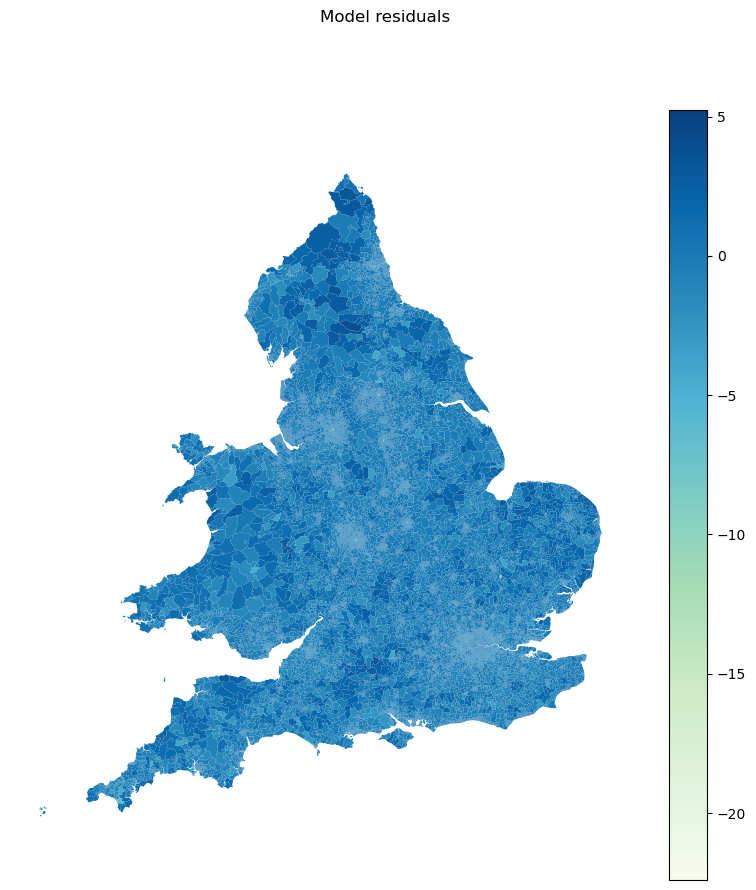

In [96]:
ax = LENG.plot(column='residual', cmap='GnBu', legend=True, figsize=(10, 10), edgecolor='none',linewidth=0 )
ax.figure.suptitle('Model residuals')
ax.axis('off');

In [200]:
#from libpysal.weights import Queen  # or Rook/KNN depending on your spatial structure
from libpysal.weights import KNN
from esda.moran import Moran
from esda.moran import Moran_Local

In [205]:
LENG['geometry'] = LENG.geometry.buffer(0)
LENG = LENG[~LENG['geometry'].is_empty & LENG['geometry'].notna()]
LENG = LENG[~LENG['residual'].isna()]

In [206]:
# Create spatial weights (every polygon has 4 neighbors)
w = KNN.from_dataframe(LENG, k=4)
w.transform = 'R'

# Run Moran's I
moran = Moran(LENG['residual'], w)
print(f"Moran's I: {moran.I:.4f}, p-value: {moran.p_sim:.4f}")

/opt/anaconda3/envs/pysal/lib/python3.13/site-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


Moran's I: 0.3586, p-value: 0.0010


(np.float64(57217.15077000031),
 np.float64(684141.35263),
 np.float64(-25470.00869500003),
 np.float64(690060.378195))

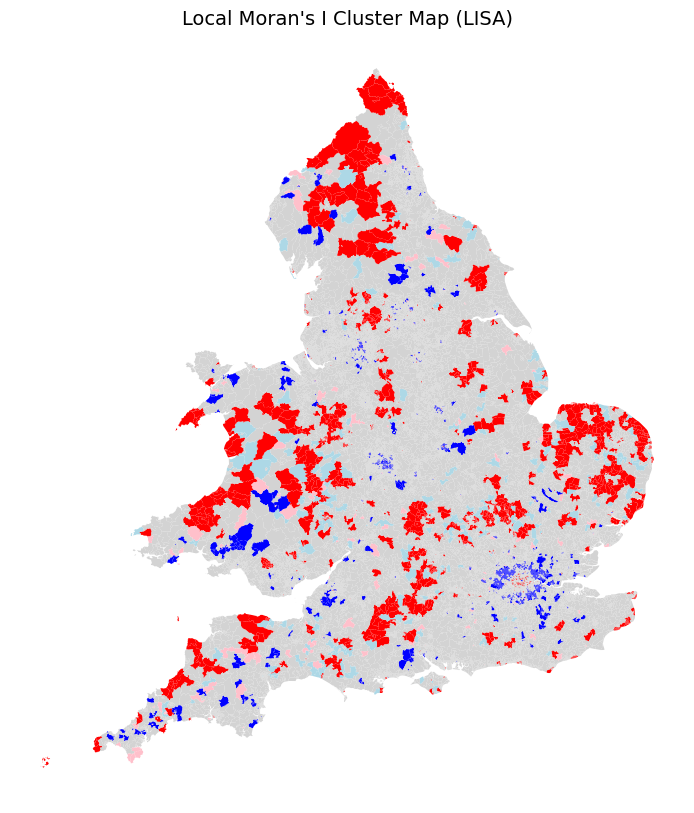

In [207]:

# Calculate Local Moran's I
moran_local = Moran_Local(LENG['residual'], w)

# Add cluster labels
LENG['cluster'] = moran_local.q
LENG['significant'] = moran_local.p_sim < 0.05  # or another threshold

# Define cluster labels and colors
cluster_labels = {
    1: 'High-High',
    2: 'Low-High',
    3: 'Low-Low',
    4: 'High-Low'
}
cluster_colors = {
    1: 'red',
    2: 'lightblue',
    3: 'blue',
    4: 'pink'
}

# Create a color column based on significance and cluster type
LENG['color'] = 'lightgrey'  # default
for cluster, color in cluster_colors.items():
    LENG.loc[(LENG['cluster'] == cluster) & LENG['significant'], 'color'] = color

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
LENG.plot(color=LENG['color'], ax=ax, edgecolor=None, linewidth=0)
ax.set_title("Local Moran's I Cluster Map (LISA)", fontsize=14)
ax.axis('off')

<Axes: xlabel='D_GAP_normalised', ylabel='residual'>

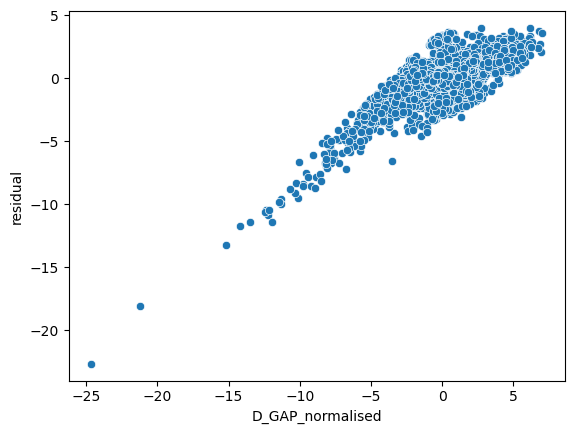

In [102]:

sns.scatterplot(x=eng["D_GAP_normalised"], y=eng["residual"])


In [103]:
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW

In [208]:
dependent_var = 'D_GAP_normalised'
control_vars = ['C_OffGrid_prop', 'E_FloorArea_mean']
control_form = ' + '.join(control_vars)
independent_vars = ['E_EFFICIENCY_mean','E_SOLID_FUEL_HIGH','E_AGE_mean','heat_loss']
independent_form = ' + '.join(independent_vars)
all_vars = [dependent_var] + control_vars + independent_vars

In [215]:
# --- Dependent variable (n, 1) ---
y = np.array(LENG['D_GAP_normalised']).reshape((-1, 1))

# --- Example: split predictors into separate arrays ---
# Control variables
offgrid = np.array(LENG['C_OffGrid_prop']).reshape((-1, 1))
floorarea = np.array(LENG['E_FloorArea_mean']).reshape((-1, 1))

# Independent variables
#efficiency = np.array(LENG['E_EFFICIENCY_mean']).reshape((-1, 1))
#solidfuel = np.array(LENG['E_SOLID_FUEL_HIGH']).reshape((-1, 1))
#heatpump = np.array(LENG['E_HEAT_MAIN_HEATPUMP_prop']).reshape((-1, 1))
#ratio = np.array(LENG['D_Gas_Elec_Meter_ratio']).reshape((-1, 1))
#age = np.array(LENG['E_AGE_mean']).reshape((-1, 1))
#heatloss = np.array(LENG['heat_loss']).reshape((-1, 1))

# --- Categorical variable WEATHER_REGION needs dummy encoding first ---
# Create dummies and drop first to avoid collinearity
#weather_dummies = pd.get_dummies(LENG['WEATHER_REGION'], drop_first=True, dtype=float)
# Convert each dummy column to a separate (n, 1) array
#weather_arrays = [np.array(weather_dummies[col]).reshape((-1, 1)) for col in weather_dummies.columns]

# --- Stack all predictors horizontally ---
X = np.hstack([
    offgrid,
    floorarea])
    #efficiency,
    #solidfuel,
    #heatpump,
    #ratio,
    #age,
    #heatloss])
#] + weather_arrays)  # add the dummy arrays at the end

# 2. Extract coordinates (centroids of LSOAs)
coords = np.column_stack([LENG.geometry.centroid.x, LENG.geometry.centroid.y])


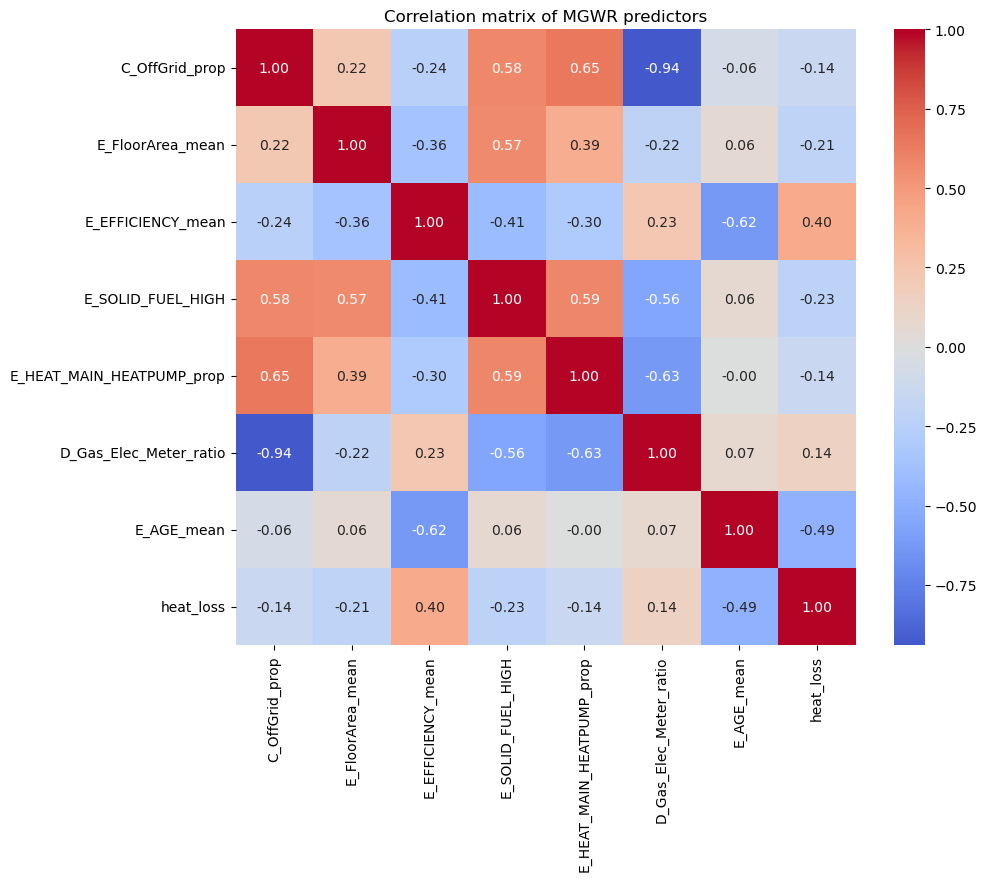

In [158]:

# List of continuous predictors
predictor_names = [
    'C_OffGrid_prop',
    'E_FloorArea_mean',
    'E_EFFICIENCY_mean',
    'E_SOLID_FUEL_HIGH',
    'E_HEAT_MAIN_HEATPUMP_prop',
    'D_Gas_Elec_Meter_ratio',
    'E_AGE_mean',
    'heat_loss'
]

# Build DataFrame with predictors
X_df = LENG[predictor_names].copy()

# Add dummies for WEATHER_REGION
#weather_dummies = pd.get_dummies(LENG['WEATHER_REGION'], drop_first=True, dtype=float)
#X_df = pd.concat([X_df, weather_dummies], axis=1)
# Compute correlation matrix
corr_matrix = X_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation matrix of MGWR predictors")
plt.show()

In [142]:
y

array([[-0.70503306],
       [-9.56891509],
       [-0.65147993],
       ...,
       [ 0.09562095],
       [-1.75145437],
       [-1.44927427]], shape=(35689, 1))

In [143]:
X

array([[ 8.97200000e+01, -8.41061520e+01, -2.84217094e-14, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 9.72400000e+01, -8.38262967e+01,  3.87343813e+01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.54000000e+00, -8.91869723e+01,  2.26924627e+01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-8.18400000e+01, -7.21737033e+01,  6.69085046e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-9.94600000e+01, -6.65572979e+01,  5.67916163e+01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-9.11400000e+01, -7.87454765e+01,  7.33172108e+01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],
      shape=(35689, 22))

In [161]:


# Use X as before (after removing problematic columns)
X = X_df.to_numpy(dtype=float)
y = LENG['D_GAP_normalised'].to_numpy(dtype=float).reshape((-1,1))
coords = np.column_stack([LENG.geometry.centroid.x.values,
                          LENG.geometry.centroid.y.values]).astype(float)

# Standardize X (optional but can help)
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Single bandwidth
selector = Sel_BW(coords, y, X, multi=False, constant=True)
bw = selector.search()
mgwr_model = MGWR(coords, y, X, selector=bw, multi=False, constant=True).fit()
print(mgwr_model.summary())

python(34134) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(34135) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(34136) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(34137) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(34138) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(34139) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(34140) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(34141) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(34142) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(34143) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/opt/anaconda3/envs/

LinAlgError: Matrix is singular.

In [216]:
selector = Sel_BW(coords, y, X, multi=True)
bw = selector.search()
print("Optimal bandwidths:", bw)

mgwr_model = MGWR(coords, y, X, selector=bw, fixed=False, kernel='bisquare', constant=True).fit()
print(mgwr_model.summary())

python(39935) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(39937) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(39939) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(39941) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(39942) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(39944) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(39945) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(39946) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(39948) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(39949) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


KeyboardInterrupt: 

In [ ]:
predictor_names = [
    'C_OffGrid_prop',
    'E_FloorArea_mean',
    'E_EFFICIENCY_mean',
    'E_SOLID_FUEL_HIGH'
]

X = LENG[predictor_names].to_numpy(dtype=float)
y = LENG['D_GAP_normalised'].to_numpy(dtype=float).reshape((-1,1))
coords = np.column_stack([LENG.geometry.centroid.x.values,
                          LENG.geometry.centroid.y.values]).astype(float)

# Bandwidth selection and MGWR fit
selector = Sel_BW(coords, y, X, multi=True, constant=True)
bw = selector.search()
mgwr_model = MGWR(coords, y, X, selector=bw, constant=True).fit()
print(mgwr_model.summary())